<a href="https://colab.research.google.com/github/gkfthddk/ckwinter2019/blob/master/2019%EA%B2%A8%EC%9A%B8%ED%95%99%EA%B5%90UOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Tutorials

## [딥러닝 체험하기](https://playground.tensorflow.org/)

## 모듈 불러오기


딥러닝을 편리하게 사용하기 위해 딥러닝 모듈인 keras와 numpy, sklearn등 데이터 처리에 유용한 모듈을 이용하고 시각화를 위해  matplotlib를 불러옵니다.

In [0]:
# load kears and utility modules
import h5py
import matplotlib
# matplotlib.use("AGG")  # To batch graphics
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential, Model
from keras.layers import (Input, Dense, Activation, 
                          Flatten, Conv2D,
                          Dropout, Reshape, ZeroPadding2D,
			      UpSampling2D, BatchNormalization, 
                          MaxPooling2D)
from keras.optimizers import SGD
import seaborn as sns
import sklearn
import numpy as np
import tensorflow as tf
from keras.utils import plot_model

Using TensorFlow backend.


## 데이터 선택하기


실습에서 사용할 데이터를 숫자 손글씨 그림 데이터인 MNIST와 의류 그림 데이터인 Fashion MNIST 중 선택할 수 있습니다.

두 데이터셋 모두 28*28 픽셀로 이루어진 데이터와 10가지 종류의 라벨로 이루어져 있습니다.

In [0]:
#@title 기본 제목 텍스트 { vertical-output: true, form-width: "50%", display-mode: "both" }
number = True #@param {type:"boolean"}
# select data for deep learning
if(number):
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  mnist_labels = ["0",  # index 0
                  "1",      # index 1
                  "2",     # index 2 
                  "3",        # index 3 
                  "4",         # index 4
                  "5",       # index 5
                  "6",        # index 6 
                  "7",      # index 7 
                  "8",          # index 8 
                  "9"]   # index 9
  print("Loaded MNIST data about number")
else:
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
  mnist_labels = ["T-shirt/top",  # index 0
                  "Trouser",      # index 1
                  "Pullover",     # index 2 
                  "Dress",        # index 3 
                  "Coat",         # index 4
                  "Sandal",       # index 5
                  "Shirt",        # index 6 
                  "Sneaker",      # index 7 
                  "Bag",          # index 8 
                  "Ankle boot"]   # index 9
  print("Loaded MNIST data about fashion")
  
print("number of train samples",len(x_train),len(y_train))
print("number of test samples",len(x_test),len(y_test))

## 데이터 확인하기



데이터는 10가지로 이루어져있고 데이터를 그림으로 보여주어 어떤 데이터를 사용하는지 확인할 수 있습니다.

실습에서는 그림 데이터로 라벨을 유추하는 작업을 할 것입니다.

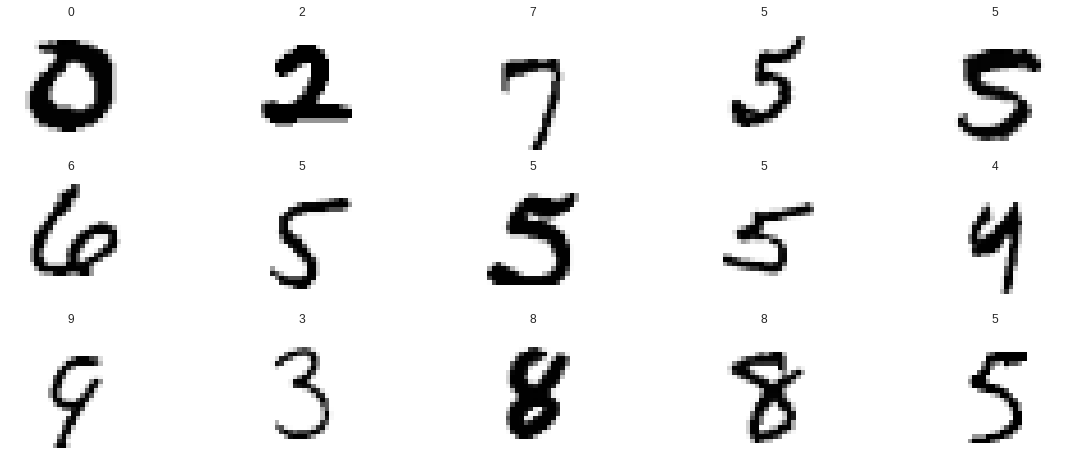

In [0]:
# check data
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_train.shape[0],size=15, replace=False)):
  ax=figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
  # Display each image
  ax.imshow(np.squeeze(x_train[index]))
  true_index = mnist_labels[y_train[index]]
  # Set the title for each image
  ax.set_title("{}".format(true_index))

## 계산 시간을 줄이기 위해 6가지 종류의 데이터만 사용

In [0]:
train_data=[]
train_label=[]
for i in range(len(y_train)):
  if(y_train[i]<=5):
    train_data.append(x_train[i])
    train_label.append(y_train[i])
test_data=[]
test_label=[]
for i in range(len(y_test)):
  if(y_test[i]<=5):
    test_data.append(x_test[i])
    test_label.append(y_test[i])
print("number of train samples",len(train_data),len(train_data))
print("number of test samples",len(test_data),len(test_data))

number of train samples 36017 36017
number of test samples 6031 6031


## 기본적인 Deep Neural Network - Multilayer Perceptron(MLP)


![대체 텍스트](http://aikorea.org/cs231n/assets/nn1/neural_net2.jpeg)

흰 원들이 노드이고 화살표 방향대로 입력을 받으면 출력을 다른 노드에 전달하며 이런 구조를 통해 입력값에서 출력(예측)값으로 결과를 얻을 수 있습니다.

### MLP Model이 학습할 수 있도록 Data 구조를 변경



데이터 형식을 keras의 기본 형식인 numpy.array 로 바꾸어 주고 라벨을 6차원의 크기 1 벡터로 만들어 학습할 수있도록 합니다.

In [0]:
from keras.utils.np_utils import to_categorical
train_data=np.array(train_data).reshape(len(train_data),28,28)
test_data=np.array(test_data).reshape(len(test_data),28,28)
train_label_enc = to_categorical(train_label)
test_label_enc=np.eye(6)[test_label]

print(train_label_enc[:10],np.array(train_label_enc).shape)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]] (36017, 6)


### Deep Neural Network를 Model로 만들기

Model은 Neural Network의 구조와 그것을 이루는 변수를 가지고 있습니다.





### Layer를 차례대로 쌓아 모델을 만드는 방법 - Sequential







layer를 순서대로 입력하면 되기 때문에 직관적이고 간단한 방법입니다.

MLP는 1차원으로 데이터를 받기 때문에 Flatten으로 28*28데이터를 1차원으로 나열해줍니다.
이때  input_shape를 입력 데이터의 모양으로 넣습니다.

노드가 모두 연결되는 Dense Layer(Fully Connected)를 추가합니다. 위의 예시 그림에서 처럼 앞뒤의 노드에 입출력 연결을 하는 층입니다.

Activation(활성함수)은 각 노드의 출력이 ![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png)이런 형태의 함수를 통과시켜 출력의 세기나 범위를 조정하는 작업입니다.
노드를 여러개 통과하며 값이 필요 이상으로 크거나 작아지는 경우를 방지 할 수 있습니다.

더 고차원의 계산을 할 수 있도록 Dense Layer를 하나 더 추가합니다.

라벨이 6개 이므로 6개의 노드로 이루어진 Dense Layer를 추가하고 Softmax를 활성함수로 사용하여 출력값이 합이 1인 각 라벨의 확률로 표현되도록 합니다.

학습 조건과 함께 Model을 완성합니다.

In [0]:
# Sequential model
model = Sequential()
model.add(Flatten(input_shape=(28,28,)))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 각 Layer를 연결 해주며 모델을 만드는 방법 - Functional

layer들 사이를 직접 연결해줄 수 있기 때문에 입체적인 Network를 만들 수 있는 방법입니다.



In [0]:
# Functional model
input1 = Input(shape=(28,28,))
flatten1 = Flatten()(input1)
dense1 = Dense(128,activation='sigmoid')(flatten1)
dense2 = Dense(128,activation='sigmoid')(dense1)
out1 = Dense(6,activation='softmax')(dense2)
model=Model(input1,out1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 이미지를 잘 학습하는 Neural Network인 Convolution Neural Network(CNN)



![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/395px-Typical_cnn.png)

데이터를 행렬 처리 하기 때문에 공간상에서 데이터들 관의 관계를 효과적으로 처리합니다.

### CNN Model이 학습할 수 있도록 Data 구조를 변경



CNN에는 기본적으로 channel 정보가 들어가기 때문에 차원을 확장 해줘야합니다.
MIST는 색깔 정보가 없으므로 channel이 1입니다.

In [0]:
from keras.utils.np_utils import to_categorical
train_data=np.array(train_data).reshape(len(train_data),28,28,1)
test_data=np.array(test_data).reshape(len(test_data),28,28,1)
train_label_enc = to_categorical(train_label)
test_label_enc=np.eye(6)[test_label]

print(train_label_enc[:10],np.array(train_label_enc).shape)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]] (36017, 6)


### CNN Model 만들기



CNN은 channel 정보가 추가 되기 때문에 입력 모양이 (28,28,1)이 됩니다.

(3,3)단위로 Convolution 하는 층을 추가합니다. 

(2,2)단위에서 가장 큰 값을 뽑아내는 MaxPooling을 합니다. 이를 통해 가장 중요도가 큰 부분만 처리할 수 있습니다.

Flatten과 Dense 통해 Convolution을 거친 값들을 MLP와 같은 방식으로 처리합니다.

In [0]:
# Convolution model
input1 = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=(3,3),activation='relu')(input1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flatten1 = Flatten()(pool1)
dense1 = Dense(128,activation='sigmoid')(flatten1)
drop1 = Dropout(0.5)(dense1)
out1 = Dense(6,activation='softmax')(dense1)
model=Model(input1,out1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model의 구조를 살펴보기
화살표 방향으로 데이터가 흘러갑니다.

([], <a list of 0 Text yticklabel objects>)

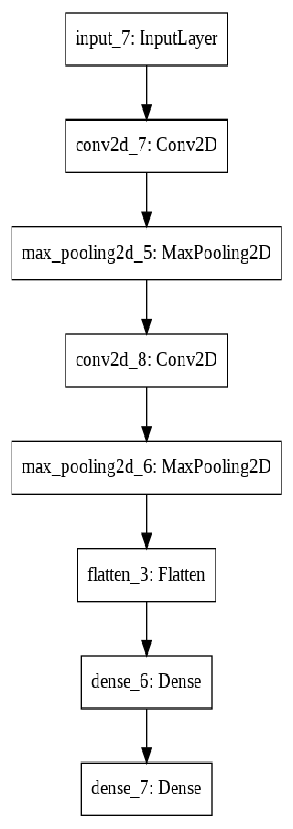

In [0]:
mimage=plot_model(model,to_file='model.png')
image=plt.imread('model.png')
plt.subplots(figsize=(5,15))
plt.imshow(image,aspect='auto')
plt.grid(True)
plt.xticks([])
plt.yticks([])

## 완성한 모델을 데이터로 학습하기


train_data를 처리하며 학습하는데 첫 데이터부터 마지막까지 처리하는데 1 epoch라 합니다.

사용하는 데이터가 작고 간단하기 때문데 3epoch만 진행합니다.

학습이 끝나고나면 train_data와 독립된 test_data로 loss와 accuracy를 측정하여 학습이 잘 되었는지 확인합니다.

loss는 softmax 값과 실제 라벨간의 차리로 계산한 손실로 이 값을 줄이는 방향으로 학습이 진행됩니다.

accuracy는 라벨을 예측하여 실제 라벨을 맞출 확률을 계산합 값입니다.

In [0]:
model.fit(train_data, train_label_enc, epochs=3, verbose=1)
loss, accuracy = model.evaluate(test_data, test_label_enc, verbose=0)
print("Loss={:.2f}\nAccuracy = {:.2f}".format(loss, accuracy))

Epoch 1/3
36017/36017 [==============================] - 8s 212us/step - loss: 0.1973 - acc: 0.9541
Epoch 2/3
36017/36017 [==============================] - 7s 203us/step - loss: 0.0505 - acc: 0.9856
Epoch 3/3
36017/36017 [==============================] - 7s 208us/step - loss: 0.0384 - acc: 0.9888
Loss=0.03
Accuracy = 0.99


## 학습 결과 확인하기



데이터를 시각화 하면서 데이터에 대한 Model의 예측 라벨이 표현되고 ()안의 숫자는 실제 라벨입니다.

학습이 잘 되었는지 학습이 어떤 데이터에 대해 잘 되지 않았는지 확인해 볼 수 있습니다.


 Test accuracy: 0.9918753108937158


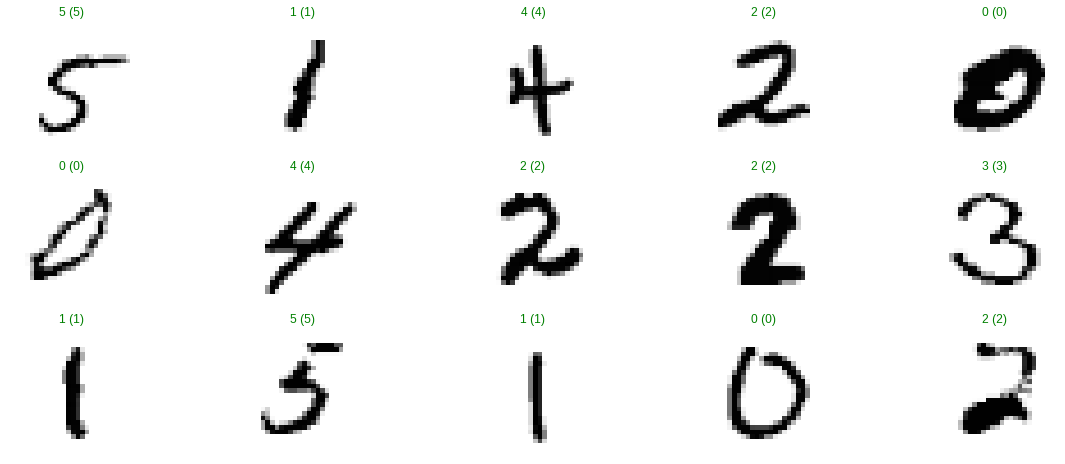

In [0]:
score = model.evaluate(test_data, test_label_enc, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
prediction=model.predict(test_data)
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(test_data.shape[0],size=15, replace=False)):
  ax=figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
  # Display each image
  ax.imshow(np.squeeze(test_data[index]))
  predict_index = mnist_labels[np.argmax(prediction[index])]
  true_index = mnist_labels[test_label[index]]
  # Set the title for each image
  ax.set_title("{} ({})".format(predict_index, 
                                true_index),
                                color=("green" if predict_index == true_index else "red"))

#심화 Recurrent Neural Network(RNN) 



![대체 텍스트](https://cdn-images-1.medium.com/max/1600/0*c1L9jjcsASagk_Hu.png)

여러개의 임력값이 순서대로 주어지면(x0~xt) 각 출력은 이전에 입력받은 값의 영향을 받으며 출력값도 순서대로 나옵니다(h0~ht) 

데이터 순서의 관계를 효과적으로 처리하며 구조가 간단하기 때문에 계산이 빠릅니다. 

https://datascienceschool.net/view-notebook/1d93b9dc6c624fbaa6af2ce9290e2479/

In [3]:
# load kears and utility modules
import h5py
import matplotlib
# matplotlib.use("AGG")  # To batch graphics
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential, Model
from keras.layers import (Input, Dense, Activation, 
                          Flatten, Conv2D,
                          Dropout, Reshape, ZeroPadding2D,
			      UpSampling2D, BatchNormalization, 
                          MaxPooling2D)
from keras.optimizers import SGD
import seaborn as sns
import sklearn
import numpy as np
import tensorflow as tf
from keras.utils import plot_model

Using TensorFlow backend.


## 데이터 생성하기

간단한 실습을 위해 sin그래프를 그리고 연속된 점이 주어지면 그 다음 점을 예측하도록 학습할것입니다.

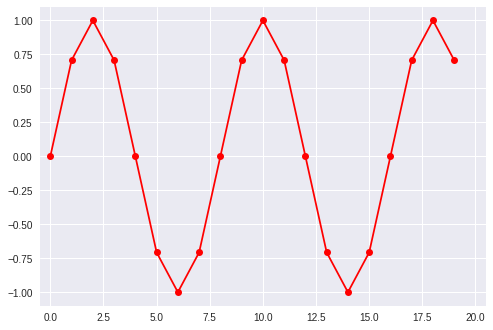

In [4]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

## RNN Model이 데이터를 학습할 수 있게 구조 변경하기
입력 데이터를 3개를 입력값(데이터)으로 정리하고 그 다음 순서로 나오게 될 데이터를 목표 출력 값(라벨)으로 정리합니다.

In [36]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
print(S[:5, :3])
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
print(X_train.shape, Y_train.shape)

[[ 0.00000000e+00  7.07106781e-01  1.00000000e+00]
 [ 7.07106781e-01  1.00000000e+00  7.07106781e-01]
 [ 1.00000000e+00  7.07106781e-01  1.22464680e-16]
 [ 7.07106781e-01  1.22464680e-16 -7.07106781e-01]
 [ 1.22464680e-16 -7.07106781e-01 -1.00000000e+00]]
(18, 3, 1) (18,)


In [34]:
X_train[0]

array([[0.        ],
       [0.70710678],
       [1.        ]])

In [35]:
Y_train[0]

0.7071067811865476

## 데이터 확인하기

파란색으로 표현된 3개의 입력 데이터와 빨간색으로 표현된 목표 출력 데이터를 시각화합니다.

파란색 점과 빨간색 점이 sin그래프에서 연결됨을 확인할 수 있습니다.

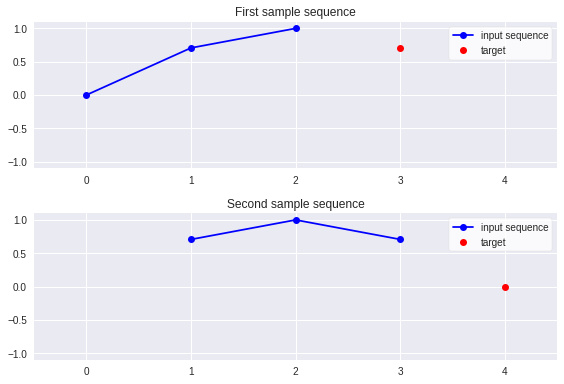

In [39]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend(frameon=True,facecolor='w')
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend(frameon=True,facecolor='w')
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

### RNN Model 만들기

이번에 사용하는 데이터는 3개로 이루져있고 channel이 1이기 때문에 입력 모양이 (3,1)이 됩니다.

간단한 RNN layer를 추가합니다.

Dense를 이용해 RNN 출력값을 처리하고 출력값이 1,0으로 나뉘는게 아니라 어떤 값을 가지기 때문에 linear activation을 사용합니다.

학습조건과 함께 모델을 완성합니다.

In [0]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

## Model의 구조를 살펴보기
화살표 방향으로 데이터가 흘러갑니다.

([], <a list of 0 Text yticklabel objects>)

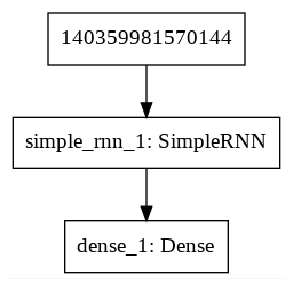

In [43]:
mimage=plot_model(model,to_file='model.png')
image=plt.imread('model.png')
plt.subplots(figsize=(5,5))
plt.imshow(image,aspect='auto')
plt.grid(True)
plt.xticks([])
plt.yticks([])

## Model의 상태를 확인하기

학습을 진행하기 전에 model에 데이터를 줬을 때 어떤 출력값을 내고 이게 목표 출력값과 어떤 차이를 보이는지 확인합니다.

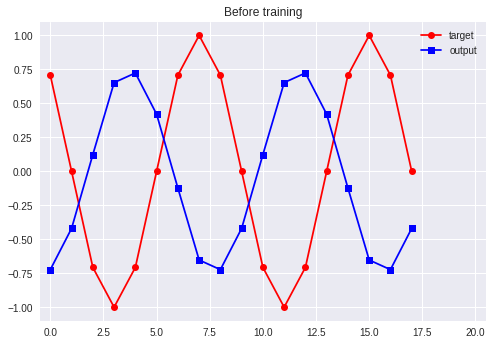

In [0]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

## Model 학습 진행하기
RNN은 처리속도가 빠르고 이번에 사용하는 데이터가 적기 때문에 100epochs 동안 학습을 합니다.

학습 과정중의 loss값을 저장하여 학습이 진행될 수록 loss 값이 어떻게 변하는지 그래프를 볼 수 있습니다.

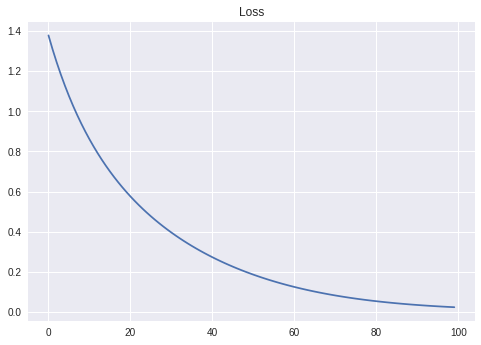

In [44]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

## 학습 결과 확인하기

학습전 model 상태를 확인한 방법으로 학습후 상태를 확인합니다.

목표 출력값과 model의 출력값이 비슷하게 나타남을 확인 할 수 있습니다.

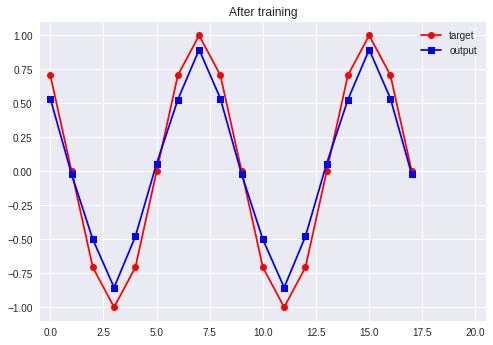

In [0]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()